>Homework 2
## Mukhil Azhagan Mallaiyan Sathiaseelan
> EEE-6561 Fundamentals of Biometric Identification 


### Importing necessary libraries

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Load data

In [2]:
f=open('simMatrix1.txt','r')
sim_Matrix1=np.loadtxt(f)
f.close()
f=open('simMatrix2.txt','r')
sim_Matrix2=np.loadtxt(f)
f.close()

In [3]:
#Load Test Case
#   test if file loaded in the requried format and size 
print("shape of Similarity Matrix 1: "+ str(sim_Matrix1.shape))
print("shape of Similarity Matrix 2: "+ str(sim_Matrix2.shape))

shape of Similarity Matrix 1: (466, 466)
shape of Similarity Matrix 2: (466, 466)


### Code for Computation

In [4]:
### For System 1 :

#sys1_rows: [int]; Number of rows for system 1
#sys1_cols: [int]; Number of columns for system 1
sys1_rows=sim_Matrix1.shape[0]
sys1_cols=sim_Matrix1.shape[1]

#sys1_max_galleryIndex: [1D array/vector]; Has the index of maximum gallery scores for each probe for system 1
#sys1_max_galleryValue: [1D array/vector]; Has the value of maximum gallery scores for each probe for system 1
sys1_max_galleryIndex= np.zeros(sys1_rows)
sys1_max_galleryValue= np.zeros(sys1_rows)
#sys1_genuineScore: [1D array/vector]; Has the values of genuine scores from the matrix for system 1
#sys1_imposterScore: [1D array/vector]; Has the values of imposter scores from the matrix for system 1
sys1_genuineScore=np.zeros(sys1_rows)
sys1_imposterScore=np.zeros(sys1_rows*sys1_rows-sys1_rows)

# Counters and Index Trackers
k=0
m=0

for i in range(sys1_rows):
    sys1_max_galleryIndex[i]=np.argmax(sim_Matrix1[i,:])
    sys1_max_galleryValue[i]=np.max(sim_Matrix1[i,:])

for i in range(sys1_rows):
    for j in range(sys1_cols):
        if i==j:
            sys1_genuineScore[k]=sim_Matrix1[i,j]
            k=k+1
        else:
            sys1_imposterScore[m]=sim_Matrix1[i,j]
            m=m+1

#Distribution Parameters for System 1 
mean_sys1_genuine=np.mean(sys1_genuineScore)
sd_sys1_genuine=np.var(sys1_genuineScore)**0.5
mean_sys1_imposter=np.mean(sys1_imposterScore)
sd_sys1_imposter=np.var(sys1_imposterScore)**0.5 
            
dprime_sys1=(2**0.5)*abs(mean_sys1_genuine-mean_sys1_imposter)/(( np.var(sys1_genuineScore)+np.var(sys1_imposterScore))**0.5)
    
    
### For System 2 :

#sys2_rows: [int]; Number of rows in system 2
#sys2_cols: [int]; Number of columns in system 2
sys2_rows=sim_Matrix2.shape[0]
sys2_cols=sim_Matrix2.shape[1]

#sys2_max_galleryIndex: [1D array/vector]; Has the index of maximum gallery scores for each probe for system 2
#sys2_max_galleryValue: [1D array/vector]; Has the value of maximum gallery scores for each probe for system 2
sys2_max_galleryIndex= np.zeros(sys2_rows)
sys2_max_galleryValue= np.zeros(sys2_rows)
#sys2_genuineScore: [1D array/vector]; Has the values of genuine scores from the matrix for system 2
#sys2_imposterScore: [1D array/vector]; Has the values of imposter scores from the matrix for system 2
sys2_genuineScore=np.zeros(sys2_rows)
sys2_imposterScore=np.zeros(sys2_rows*sys2_rows-sys2_rows)

# Counters and Index Trackers
k=0
m=0

for i in range(sys2_rows):
    sys2_max_galleryIndex[i]=np.argmax(sim_Matrix2[i,:])
    sys2_max_galleryValue[i]=np.max(sim_Matrix2[i,:])

for i in range(sys2_rows):
    for j in range(sys2_cols):
        if i==j:
            sys2_genuineScore[k]=sim_Matrix2[i,j]
            k=k+1
        else:
            sys2_imposterScore[m]=sim_Matrix2[i,j]
            m=m+1
            
#Distribution Parameters for System 2 
mean_sys2_genuine=np.mean(sys2_genuineScore)
sd_sys2_genuine=np.var(sys2_genuineScore)**0.5
mean_sys2_imposter=np.mean(sys2_imposterScore)
sd_sys2_imposter=np.var(sys2_imposterScore)**0.5 



# Answers

## Part 1

a)

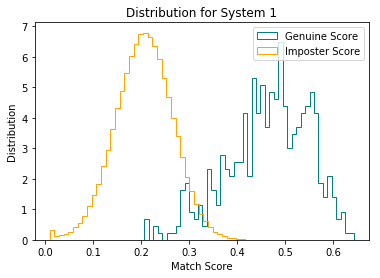

In [6]:
## Histogram Plots / Distribution Plots


### For System 1 :

# Note , the distribution is not normalized to 1
plt.hist(sys1_genuineScore,density=True,stacked=True,bins=round(sys1_rows/10),histtype='step',color='teal',label='Genuine Score')
plt.hist(sys1_imposterScore,density=True,stacked=True,bins=round(sys1_rows/10),histtype='step',color='orange',label='Imposter Score')
plt.title('Distribution for System 1')
plt.xlabel('Match Score')
plt.ylabel('Distribution')
plt.legend()


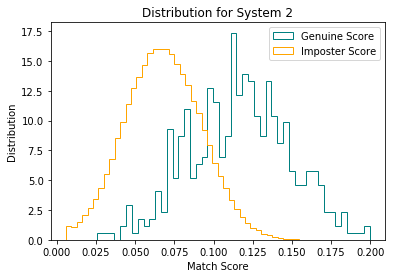

In [7]:

### For System 2 :
# Note , the distribution is not normalized to 1
plt.hist(sys2_genuineScore,density=True,stacked=True,bins=round(sys2_rows/10),histtype='step',color='teal',label='Genuine Score')
plt.hist(sys2_imposterScore,density=True,stacked=True,bins=round(sys2_rows/10),histtype='step',color='orange',label='Imposter Score')
plt.title('Distribution for System 2')
plt.xlabel('Match Score')
plt.ylabel('Distribution')
plt.legend()


b)

In [10]:
def calc_tpir(simMat,t):
    '''
    Function name : calc_tpir
    Description : calculates the True Positive Identification Rate
    
    Input Arguments: 1) a Similarity matrix 'simMat'
                     2) a rank value 't'
    
    Return value : a TPIR decimal value 'tpir'
    '''
    rows=simMat.shape[0]
    cols=simMat.shape[1]
    count=0
    Match=False
    maxIndex=np.zeros(rows)
    
    for i in range(rows):
        
        # Checking if the top scores from each column contains the genuine score
        maxIndex[:]=np.argsort(simMat[i,:])[::-1]  # reverse indexing of the sorted array
        for j in range(t):
            if i in maxIndex[:t]:
                count=count+1
                break
                #print('Match '+str(count)) # Debug Statement
    
    tpir=(count/rows)
    fnir=1-tpir
    return tpir


# Array to collect the values of CMC to be plotted
system1_CMC=np.zeros(sys1_rows)
system2_CMC=np.zeros(sys2_rows)

for i in range(sys1_rows):
    system1_CMC[i]=calc_tpir(sim_Matrix1,i+1)
    system2_CMC[i]=calc_tpir(sim_Matrix2,i+1)


Text(0.5,1,'CMC curve for System 1')

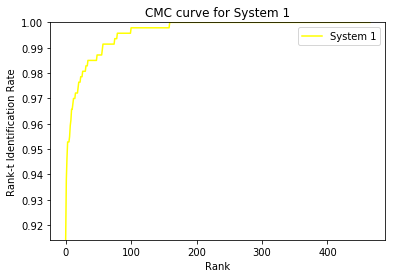

In [272]:
plt.plot(np.arange(rows),system1_CMC,color='yellow',label='System 1')
plt.ylim(np.min(system1_CMC),1)
plt.xlabel('Rank')
plt.ylabel('Rank-t Identification Rate')
plt.legend()
plt.title('CMC curve for System 1')


Text(0.5,1,'CMC curve for System 2')

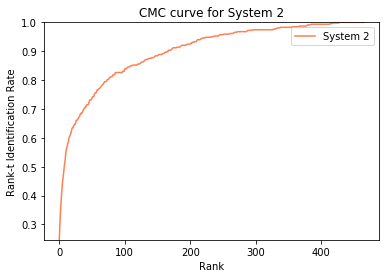

In [273]:
plt.plot(np.arange(rows),system2_CMC,color='coral',label='System 2')
plt.ylim(np.min(system2_CMC),1)
plt.xlabel('Rank')
plt.ylabel('Rank-t Identification Rate')
plt.legend()
plt.title('CMC curve for System 2')

c)

In [250]:
# Calculation using formula 1.10 from Textbook
dprime_sys1=(2**0.5)*abs(mean_sys1_genuine-mean_sys1_imposter)/(( np.var(sys1_genuineScore)+np.var(sys1_imposterScore))**0.5)
dprime_sys2=(2**0.5)*abs(mean_sys2_genuine-mean_sys2_imposter)/(( np.var(sys2_genuineScore)+np.var(sys2_imposterScore))**0.5)

# Print Statement for display
print('dprime for System 1 : '+str(dprime_sys1)+'\ndprime for System 2 : ' +str(dprime_sys2) )

dprime for System 1 : 3.51647054515
dprime for System 2 : 1.71168132762


d)

In [252]:
for i in range(rows):
    if system1_CMC[i]>.70:
        sys1_qualifyingRank=i+1
        break

for i in range(rows):
    if system2_CMC[i]>.70:
        sys2_qualifyingRank=i+1
        break

        

print('The lowest rank of System 1 when preformance is greater than 70% is : '+ str(sys1_qualifyingRank))
print('The lowest rank of System 2 when preformance is greater than 70% is : '+ str(sys2_qualifyingRank))

The lowest rank of System 1 when preformance is greater than 70% is : 1
The lowest rank of System 2 when preformance is greater than 70% is : 39


## Part 2

e)

### code

In [266]:
# For System 1

sys1_s_min=np.min(sim_Matrix1)
sys1_s_max=np.max(sim_Matrix1)
sys1_T=sys1_rows
sys1_p=(sys1_s_max-sys1_s_min)/(sys1_T-1)
sys1_FAR=0
sys1_FRR=0

sys1_FAR=np.zeros(sys1_rows)
sys1_FRR=np.zeros(sys1_rows)



for j in range(sys1_rows):
    
    # Calculating the thresholf for every j
    sys1_n= sys1_s_min +((j+1)-1)*sys1_p
    
    # FAR for System 1
    for i in range(sys1_imposterScore.size):
        if sys1_imposterScore[i]>= sys1_n:
            sys1_FAR[j]=sys1_FAR[j]+1
    sys1_FAR[j]=sys1_FAR[j]/sys1_imposterScore.size
    
    # FRR for System 1
    for i in range(sys1_genuineScore.size):
        if sys1_genuineScore[i]< sys1_n:
            sys1_FRR[j]=sys1_FRR[j]+1
    sys1_FRR[j]=sys1_FRR[j]/sys1_genuineScore.size
    
    




# For System 2

sys2_s_min=np.min(sim_Matrix2)
sys2_s_max=np.max(sim_Matrix2)
sys2_T=sys2_rows
sys2_p=(sys2_s_max-sys2_s_min)/(sys2_T-1)
sys2_FAR=0
sys2_FRR=0

sys2_FAR=np.zeros(sys2_rows)
sys2_FRR=np.zeros(sys2_rows)



for j in range(sys2_rows):
    
    # Calculating the threshold for every j
    sys2_n= sys2_s_min +((j+1)-1)*sys2_p
    
    # FAR for System 2
    for i in range(sys2_imposterScore.size):
        if sys2_imposterScore[i]>= sys2_n:
            sys2_FAR[j]=sys2_FAR[j]+1
    sys2_FAR[j]=sys2_FAR[j]/sys2_imposterScore.size
    
    # FRR for System 2
    for i in range(sys2_genuineScore.size):
        if sys2_genuineScore[i]< sys2_n:
            sys2_FRR[j]=sys2_FRR[j]+1
    sys2_FRR[j]=sys2_FRR[j]/sys2_genuineScore.size

### Plots

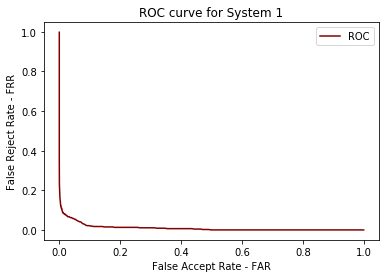

In [276]:
plt.plot(sys1_FAR,sys1_FRR,color='maroon',label='ROC')
plt.title('ROC curve for System 1')
plt.xlabel('False Accept Rate - FAR')
plt.ylabel('False Reject Rate - FRR')
plt.legend()

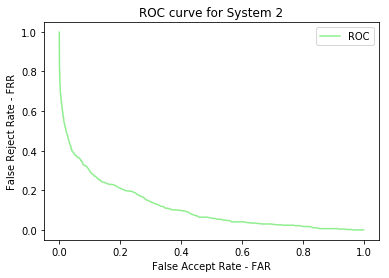

In [275]:
plt.plot(sys2_FAR,sys2_FRR,color='lightgreen',label='ROC')
plt.title('ROC curve for System 2')
plt.xlabel('False Accept Rate - FAR')
plt.ylabel('False Reject Rate - FRR')
plt.legend()

f)

In [335]:
## EER for System 1
EER_catch=False

for i in range(rows):
    if abs(sys1_FAR[i] - sys1_FRR[i]) < 2*sys1_p:
        EER_catch=True
        sys1_EER=sys1_FAR[i]
        sys1_EER_index=i

print('The Equal Error rate of System 1 is : '+str(sys1_EER))
print(sys1_EER_index)


## EER for System 2

EER_catch=False

for i in range(rows):
    if abs(sys2_FAR[i] - sys2_FRR[i]) < 2*sys2_p:
        EER_catch=True
        sys2_EER=sys2_FAR[i]
        sys2_EER_index=i

print('The Equal Error rate of System 2 is : '+str(sys2_EER))
print(sys2_EER_index)

The Equal Error rate of System 1 is : 0.0533157967603
213
The Equal Error rate of System 2 is : 0.205653237344
197


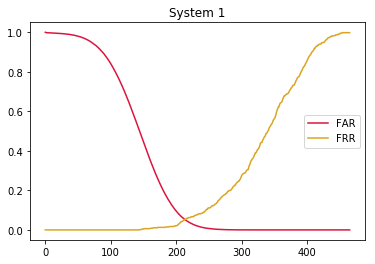

In [342]:
plt.plot(sys1_FAR,label='FAR',color='crimson')
plt.plot(sys1_FRR,label='FRR',color='goldenrod')
plt.title('System 1')
plt.legend()

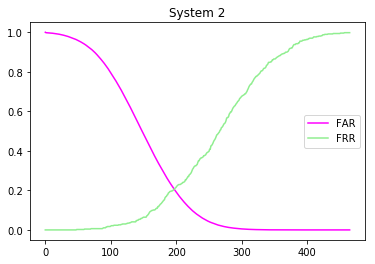

In [345]:
plt.plot(sys2_FAR,label='FAR',color='magenta')
plt.plot(sys2_FRR,label='FRR',color='lightgreen')
plt.title('System 2')
plt.legend()

g)

In [395]:
def far_to_frr(sysFAR,sysFRR,FAR_value,threshold_step):
    
    FAR_value=FAR_value/100

    for j in range(sysFRR.size):
        
        if abs(sysFAR[j]-FAR_value)<= threshold_step:
            print(j)
            print('FRR when FAR is '+str(FAR_value*100)+' % is : '+str(sysFRR[j]*100)+' %' )
            return sysFRR[j]

        
## FRR when FAR is 1 percent
far_to_frr(sys1_FAR,sys1_FRR,1,sys1_p)

## FRR when FAR is 5 percent
far_to_frr(sys1_FAR,sys1_FRR,5,sys1_p)

## FRR when FAR is 10 percent
far_to_frr(sys1_FAR,sys1_FRR,10,sys1_p)

## FRR when FAR is 20 percent
far_to_frr(sys1_FAR,sys1_FRR,20,sys1_p)

242
FRR when FAR is 1.0 % is : 9.01287553648 %
214
FRR when FAR is 5.0 % is : 5.36480686695 %
199
FRR when FAR is 10.0 % is : 2.14592274678 %
180
FRR when FAR is 20.0 % is : 1.28755364807 %


0.012875536480686695

h)

I would consider System 1 is better performing for various reasons,

1. d' for System 1 (around 3.5) is higher than that of System 2(around 1.7)
2. The ROC of System 1 is more close to the axis , which denotes lesser correlation amongst the classes . IN other words it means that they have high accuracy of prediction and very low false detection rates.
3. From the distribution plot of System 1 and System 2 it is obvious that The Genuine Scores and Imposter Scores of System 1 overlap far less that that of System 2. This is not a desired characteristic of any Biometric System 

and Thus i conclude that System 1 is far better than System 2 in perfromance
